In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

For warnings

In [2]:
import warnings 
warnings.simplefilter(action="ignore")

For model building

In [3]:
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import KFold

sns.set()
plt.style.use('ggplot')

### **Data Collection and Analysis**

Loading the data from csv file to pandas dataframe

In [4]:
parkinsons_data=pd.read_csv('../datasets/Parkinsons dataset.csv')

In [5]:
parkinsons_data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [6]:

print('Parkinsons Dataset shape:',parkinsons_data.shape)

Parkinsons Dataset shape: (195, 24)


In [7]:
parkinsons_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [8]:
parkinsons_data.describe

<bound method NDFrame.describe of                name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0    phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1    phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2    phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3    phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4    phon_R01_S01_5      116.014       141.781       110.655         0.01284   
..              ...          ...           ...           ...             ...   
190  phon_R01_S50_2      174.188       230.978        94.261         0.00459   
191  phon_R01_S50_3      209.516       253.017        89.488         0.00564   
192  phon_R01_S50_4      174.688       240.005        74.287         0.01360   
193  phon_R01_S50_5      198.764       396.961        74.904         0.00740   
194  phon_R01_S50_6      214.289       260.277        77.973         0.00567   

     

### **Data preprocessing**

In [9]:
parkinsons_data.drop(['name'],axis=1,inplace=True)

In [10]:
parkinsons_data.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


Checking for missing values

In [11]:
parkinsons_data.isna().sum()

MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [12]:
parkinsons_data.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


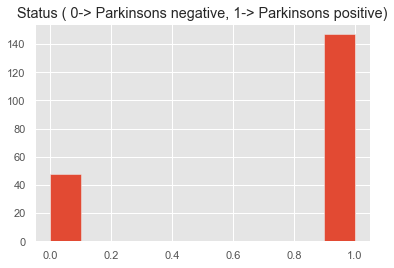

In [13]:
plt.hist(parkinsons_data['status'])
plt.title('Status ( 0-> Parkinsons negative, 1-> Parkinsons positive)')
plt.show()

## **Exploratory Data Analysis**

Print the distribution of the target variable i.e status

In [14]:
parkinsons_data["status"].value_counts()*100/len(parkinsons_data)

1    75.384615
0    24.615385
Name: status, dtype: float64

Print the classes of the target variable

In [15]:
parkinsons_data.status.value_counts()

1    147
0     48
Name: status, dtype: int64

Visualising the distribution of the status variable in the data

0-> Parkinson's negative

1-> Parkinson's positive

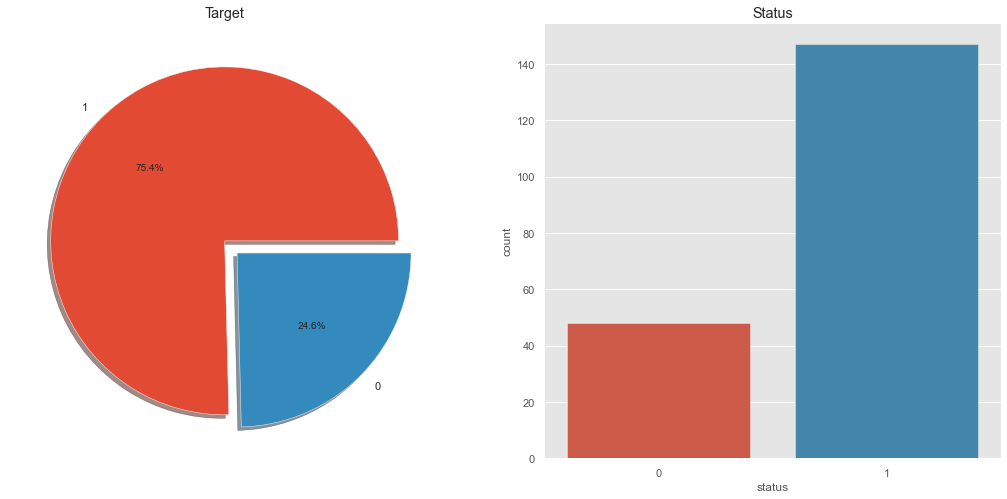

In [15]:
f,ax=plt.subplots(1,2,figsize=(18,8))
parkinsons_data['status'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Target')
ax[0].set_ylabel('')
sns.countplot('status',data=parkinsons_data,ax=ax[1])
ax[1].set_title('Status')
plt.show()

Plot the histrogram and density graphs of all variables

<AxesSubplot:xlabel='PPE', ylabel='Density'>

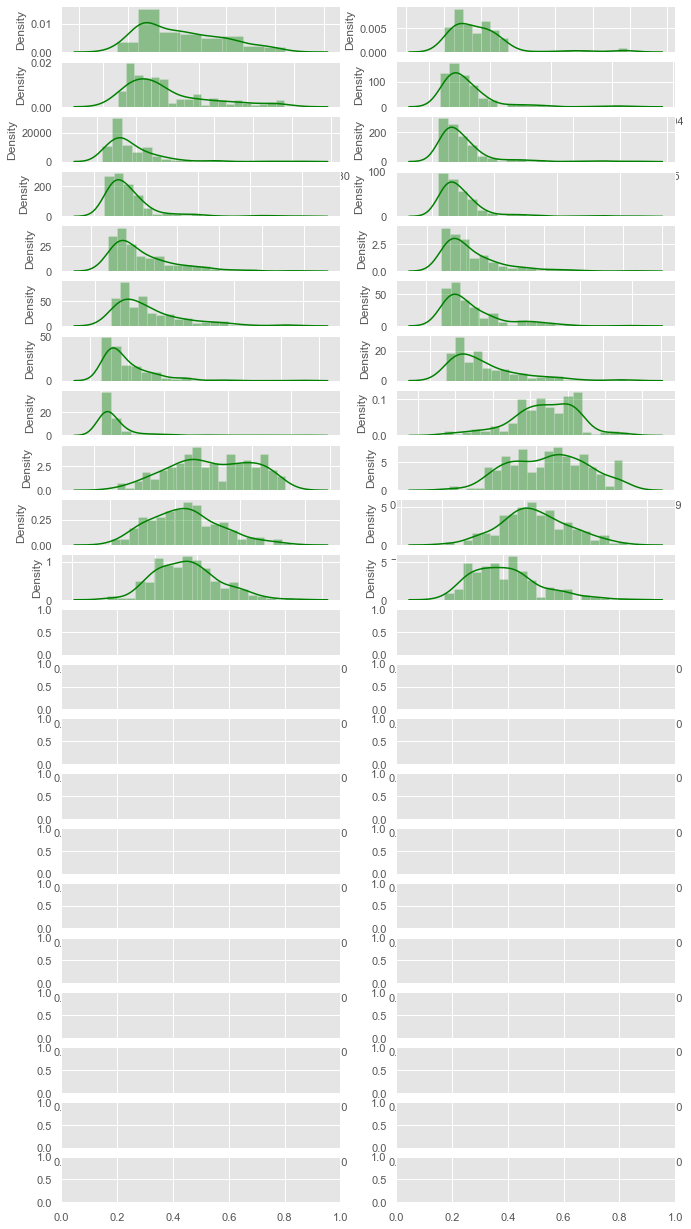

In [16]:
fig,ax=plt.subplots(22,2,figsize=(11,22))
sns.distplot(parkinsons_data['MDVP:Fo(Hz)'],ax=ax[0,0],color="green")
sns.distplot(parkinsons_data['MDVP:Fhi(Hz)'],bins=20,ax=ax[0,1],color="green")
sns.distplot(parkinsons_data['MDVP:Flo(Hz)'],bins=20,ax=ax[1,0],color="green")
sns.distplot(parkinsons_data['MDVP:Jitter(%)'],bins=20,ax=ax[1,1],color="green")
sns.distplot(parkinsons_data['MDVP:Jitter(Abs)'],bins=20,ax=ax[2,0],color="green")
sns.distplot(parkinsons_data['MDVP:RAP'],bins=20,ax=ax[2,1],color="green")
sns.distplot(parkinsons_data['MDVP:PPQ'],bins=20,ax=ax[3,0],color="green")
sns.distplot(parkinsons_data['Jitter:DDP'],bins=20,ax=ax[3,1],color="green")
sns.distplot(parkinsons_data['MDVP:Shimmer'],bins=20,ax=ax[4,0],color="green")
sns.distplot(parkinsons_data['MDVP:Shimmer(dB)'],bins=20,ax=ax[4,1],color="green")
sns.distplot(parkinsons_data['Shimmer:APQ3'],bins=20,ax=ax[5,0],color="green")
sns.distplot(parkinsons_data['Shimmer:APQ5'],bins=20,ax=ax[5,1],color="green")
sns.distplot(parkinsons_data['MDVP:APQ'],bins=20,ax=ax[6,0],color="green")
sns.distplot(parkinsons_data['Shimmer:DDA'],bins=20,ax=ax[6,1],color="green")
sns.distplot(parkinsons_data['NHR'],bins=20,ax=ax[7,0],color="green")
sns.distplot(parkinsons_data['HNR'],bins=20,ax=ax[7,1],color="green")
sns.distplot(parkinsons_data['RPDE'],bins=20,ax=ax[8,0],color="green")
sns.distplot(parkinsons_data['DFA'],bins=20,ax=ax[8,1],color="green")
sns.distplot(parkinsons_data['spread1'],bins=20,ax=ax[9,0],color="green")
sns.distplot(parkinsons_data['spread2'],bins=20,ax=ax[9,1],color="green")
sns.distplot(parkinsons_data['D2'],bins=20,ax=ax[10,0],color="green")
sns.distplot(parkinsons_data['PPE'],bins=20,ax=ax[10,1],color="green")



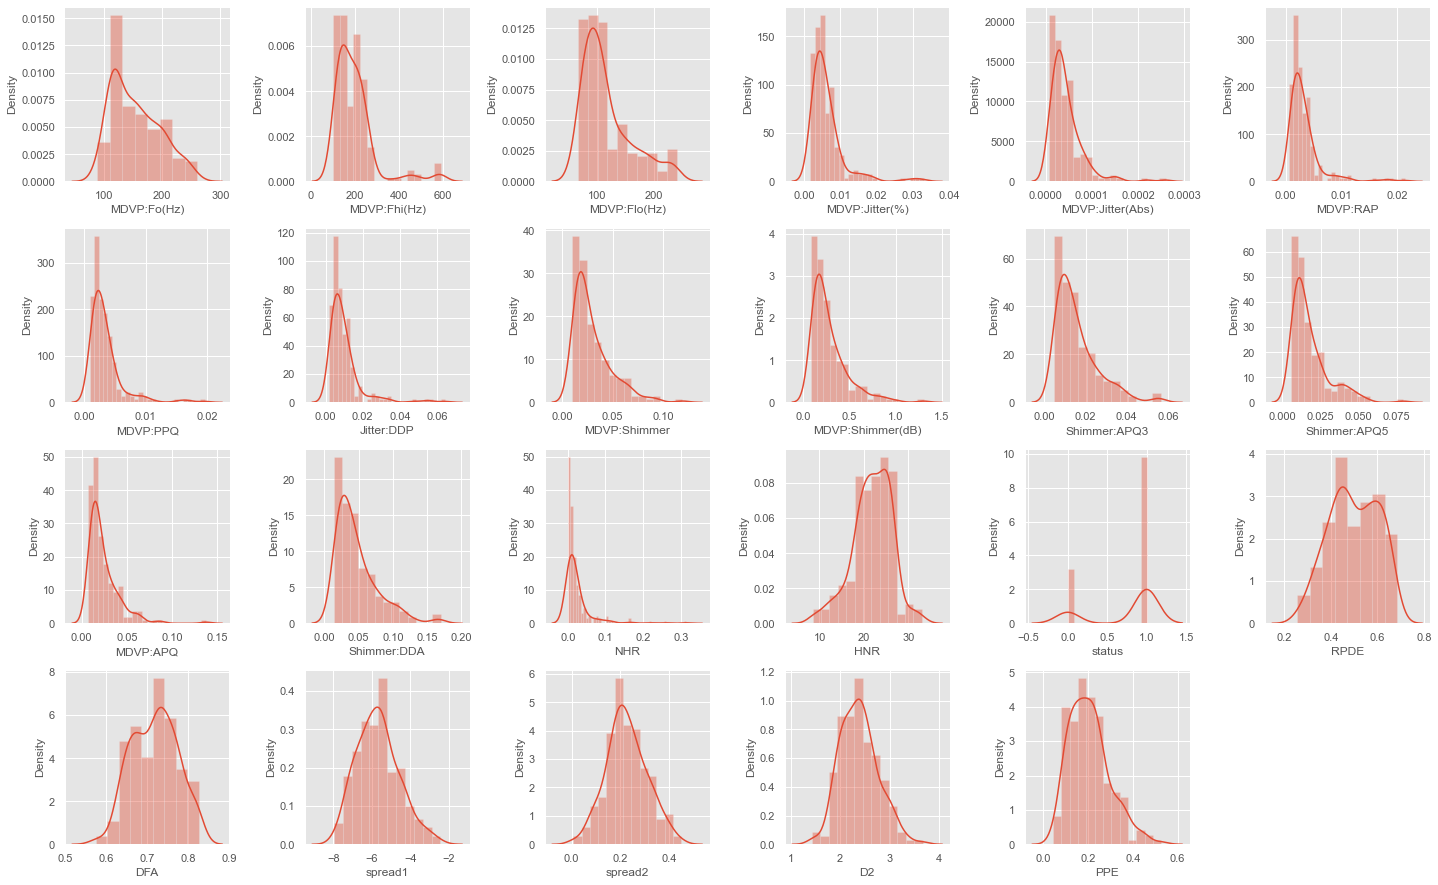

In [17]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in parkinsons_data:
    if plotnumber <= 23:
        ax = plt.subplot(5, 6, plotnumber)
        sns.distplot(parkinsons_data[column])
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

Heatmap

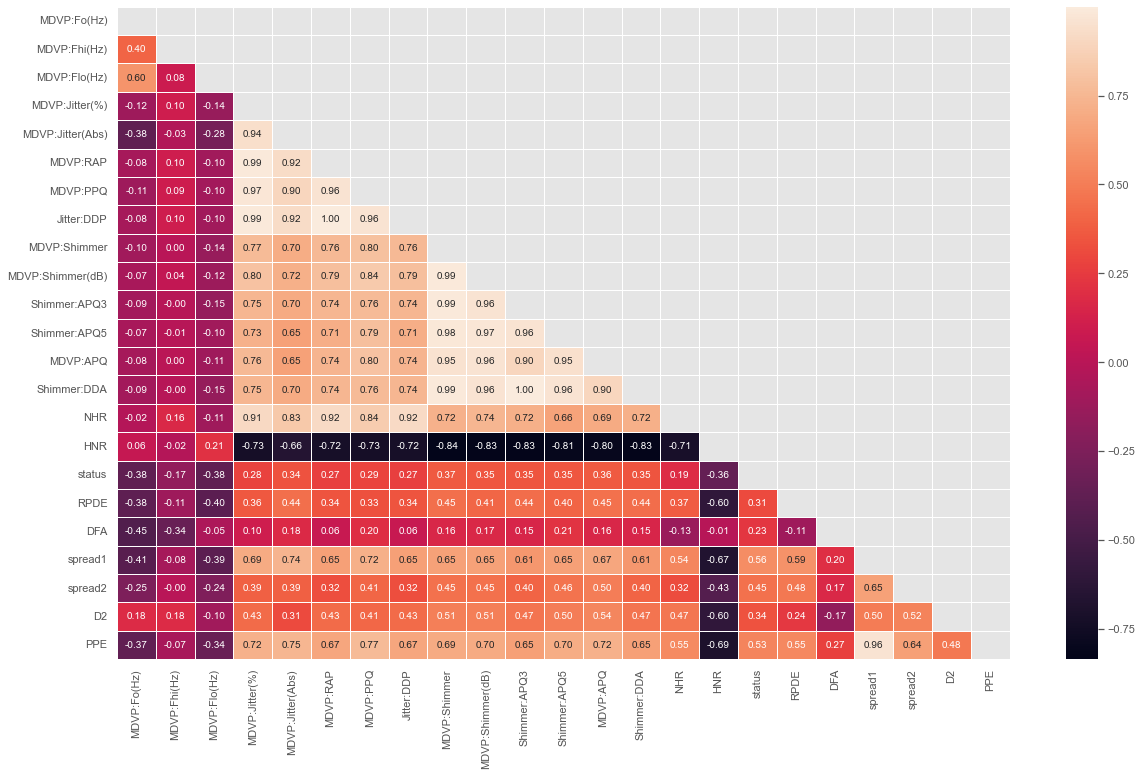

In [18]:
plt.figure(figsize = (20, 12))

corr = parkinsons_data.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))

sns.heatmap(corr, mask = mask, linewidths = 1, annot = True, fmt = ".2f")
plt.show()

In [16]:
parkinsons_data.corr()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
MDVP:Fo(Hz),1.000000,0.400985,0.596546,-0.118003,-0.382027,-0.076194,-0.112165,-0.076213,-0.098374,-0.073742,...,-0.094732,-0.021981,0.059144,-0.383535,-0.383894,-0.446013,-0.413738,-0.249450,0.177980,-0.372356
MDVP:Fhi(Hz),0.400985,1.000000,0.084951,0.102086,-0.029198,0.097177,0.091126,0.097150,0.002281,0.043465,...,-0.003733,0.163766,-0.024893,-0.166136,-0.112404,-0.343097,-0.076658,-0.002954,0.176323,-0.069543
MDVP:Flo(Hz),0.596546,0.084951,1.000000,-0.139919,-0.277815,-0.100519,-0.095828,-0.100488,-0.144543,-0.119089,...,-0.150737,-0.108670,0.210851,-0.380200,-0.400143,-0.050406,-0.394857,-0.243829,-0.100629,-0.340071
MDVP:Jitter(%),-0.118003,0.102086,-0.139919,1.000000,0.935714,0.990276,0.974256,0.990276,0.769063,0.804289,...,0.746635,0.906959,-0.728165,0.278220,0.360673,0.098572,0.693577,0.385123,0.433434,0.721543
MDVP:Jitter(Abs),-0.382027,-0.029198,-0.277815,0.935714,1.000000,0.922911,0.897778,0.922913,0.703322,0.716601,...,0.697170,0.834972,-0.656810,0.338653,0.441839,0.175036,0.735779,0.388543,0.310694,0.748162
MDVP:RAP,-0.076194,0.097177,-0.100519,0.990276,0.922911,1.000000,0.957317,1.000000,0.759581,0.790652,...,0.744919,0.919521,-0.721543,0.266668,0.342140,0.064083,0.648328,0.324407,0.426605,0.670999
MDVP:PPQ,-0.112165,0.091126,-0.095828,0.974256,0.897778,0.957317,1.000000,0.957319,0.797826,0.839239,...,0.763592,0.844604,-0.731510,0.288698,0.333274,0.196301,0.716489,0.407605,0.412524,0.769647
Jitter:DDP,-0.076213,0.097150,-0.100488,0.990276,0.922913,1.000000,0.957319,1.000000,0.759555,0.790621,...,0.744901,0.919548,-0.721494,0.266646,0.342079,0.064026,0.648328,0.324377,0.426556,0.671005
MDVP:Shimmer,-0.098374,0.002281,-0.144543,0.769063,0.703322,0.759581,0.797826,0.759555,1.000000,0.987258,...,0.987626,0.722194,-0.835271,0.367430,0.447424,0.159954,0.654734,0.452025,0.507088,0.693771
MDVP:Shimmer(dB),-0.073742,0.043465,-0.119089,0.804289,0.716601,0.790652,0.839239,0.790621,0.987258,1.000000,...,0.963202,0.744477,-0.827805,0.350697,0.410684,0.165157,0.652547,0.454314,0.512233,0.695058


Removing the highly correlated features as it might lead to multi-collinearlity

In [17]:
corr_matrix = parkinsons_data.corr().abs() 

mask = np.triu(np.ones_like(corr_matrix, dtype = bool))
tri_df = corr_matrix.mask(mask)

to_drop = [x for x in tri_df.columns if any(tri_df[x] > 0.92)]

df = parkinsons_data.drop(to_drop, axis = 1)

print(f"The reduced dataframe has {parkinsons_data.shape[1]} columns.")

The reduced dataframe has 23 columns.


In [18]:
parkinsons_data.corr()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
MDVP:Fo(Hz),1.000000,0.400985,0.596546,-0.118003,-0.382027,-0.076194,-0.112165,-0.076213,-0.098374,-0.073742,...,-0.094732,-0.021981,0.059144,-0.383535,-0.383894,-0.446013,-0.413738,-0.249450,0.177980,-0.372356
MDVP:Fhi(Hz),0.400985,1.000000,0.084951,0.102086,-0.029198,0.097177,0.091126,0.097150,0.002281,0.043465,...,-0.003733,0.163766,-0.024893,-0.166136,-0.112404,-0.343097,-0.076658,-0.002954,0.176323,-0.069543
MDVP:Flo(Hz),0.596546,0.084951,1.000000,-0.139919,-0.277815,-0.100519,-0.095828,-0.100488,-0.144543,-0.119089,...,-0.150737,-0.108670,0.210851,-0.380200,-0.400143,-0.050406,-0.394857,-0.243829,-0.100629,-0.340071
MDVP:Jitter(%),-0.118003,0.102086,-0.139919,1.000000,0.935714,0.990276,0.974256,0.990276,0.769063,0.804289,...,0.746635,0.906959,-0.728165,0.278220,0.360673,0.098572,0.693577,0.385123,0.433434,0.721543
MDVP:Jitter(Abs),-0.382027,-0.029198,-0.277815,0.935714,1.000000,0.922911,0.897778,0.922913,0.703322,0.716601,...,0.697170,0.834972,-0.656810,0.338653,0.441839,0.175036,0.735779,0.388543,0.310694,0.748162
MDVP:RAP,-0.076194,0.097177,-0.100519,0.990276,0.922911,1.000000,0.957317,1.000000,0.759581,0.790652,...,0.744919,0.919521,-0.721543,0.266668,0.342140,0.064083,0.648328,0.324407,0.426605,0.670999
MDVP:PPQ,-0.112165,0.091126,-0.095828,0.974256,0.897778,0.957317,1.000000,0.957319,0.797826,0.839239,...,0.763592,0.844604,-0.731510,0.288698,0.333274,0.196301,0.716489,0.407605,0.412524,0.769647
Jitter:DDP,-0.076213,0.097150,-0.100488,0.990276,0.922913,1.000000,0.957319,1.000000,0.759555,0.790621,...,0.744901,0.919548,-0.721494,0.266646,0.342079,0.064026,0.648328,0.324377,0.426556,0.671005
MDVP:Shimmer,-0.098374,0.002281,-0.144543,0.769063,0.703322,0.759581,0.797826,0.759555,1.000000,0.987258,...,0.987626,0.722194,-0.835271,0.367430,0.447424,0.159954,0.654734,0.452025,0.507088,0.693771
MDVP:Shimmer(dB),-0.073742,0.043465,-0.119089,0.804289,0.716601,0.790652,0.839239,0.790621,0.987258,1.000000,...,0.963202,0.744477,-0.827805,0.350697,0.410684,0.165157,0.652547,0.454314,0.512233,0.695058


In [23]:
to_drop

['MDVP:Jitter(%)',
 'MDVP:Jitter(Abs)',
 'MDVP:RAP',
 'MDVP:PPQ',
 'MDVP:Shimmer',
 'MDVP:Shimmer(dB)',
 'Shimmer:APQ3',
 'Shimmer:APQ5',
 'spread1']

In [19]:
parkinsons_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MDVP:Fo(Hz)       195 non-null    float64
 1   MDVP:Fhi(Hz)      195 non-null    float64
 2   MDVP:Flo(Hz)      195 non-null    float64
 3   MDVP:Jitter(%)    195 non-null    float64
 4   MDVP:Jitter(Abs)  195 non-null    float64
 5   MDVP:RAP          195 non-null    float64
 6   MDVP:PPQ          195 non-null    float64
 7   Jitter:DDP        195 non-null    float64
 8   MDVP:Shimmer      195 non-null    float64
 9   MDVP:Shimmer(dB)  195 non-null    float64
 10  Shimmer:APQ3      195 non-null    float64
 11  Shimmer:APQ5      195 non-null    float64
 12  MDVP:APQ          195 non-null    float64
 13  Shimmer:DDA       195 non-null    float64
 14  NHR               195 non-null    float64
 15  HNR               195 non-null    float64
 16  status            195 non-null    int64  
 1

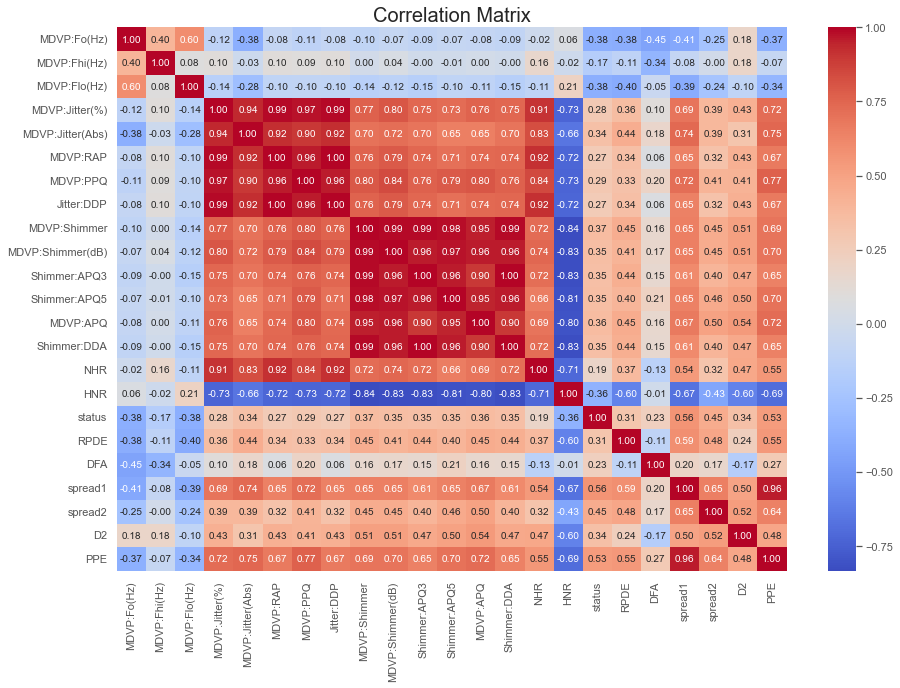

In [24]:
f, ax = plt.subplots(figsize= [15,10])
sns.heatmap(parkinsons_data.corr(), annot=True, fmt=".2f", ax=ax, cmap ='coolwarm' )
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

In [25]:
parkinsons_data.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [ ]:
p=sns.pairplot(parkinsons_data, hue = 'status')
p.fig.set_size_inches(15,15)

In [ ]:
import seaborn as sns
plt.figure(figsize=(8,7))
sns.boxplot(x = parkinsons_data['MDVP:Fo(Hz)'], color="yellow");

In [20]:
# creating the features and label
X = parkinsons_data.drop('status', axis=1)
Y = parkinsons_data['status']

In [21]:
X.columns


Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1',
       'spread2', 'D2', 'PPE'],
      dtype='object')

In [22]:
X.columns = ['MDVP_Fo_Hz' ,'MDVP_Fhi_Hz', 'MDVP_Flo_Hz','MDVP_Jitter_Percent','MDVP_Jitter_Abs', 'MDVP_RAP', 'MDVP_PPQ', 'Jitter_DDP', 
'MDVP_Shimmer', 'MDVP_Shimmer_dB', 'Shimmer_APQ3', 'Shimmer_APQ5', 'MDVP_APQ', 'Shimmer_DDA', 'NHR','HNR', 'RPDE', 'DFA', 'spread1', 'spread2','D2', 'PPE']

In [23]:
X.columns

Index(['MDVP_Fo_Hz', 'MDVP_Fhi_Hz', 'MDVP_Flo_Hz', 'MDVP_Jitter_Percent',
       'MDVP_Jitter_Abs', 'MDVP_RAP', 'MDVP_PPQ', 'Jitter_DDP', 'MDVP_Shimmer',
       'MDVP_Shimmer_dB', 'Shimmer_APQ3', 'Shimmer_APQ5', 'MDVP_APQ',
       'Shimmer_DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1', 'spread2', 'D2',
       'PPE'],
      dtype='object')

In [24]:
#splitting data into training and testing set
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 0)

In [25]:
X_train.shape

(136, 22)

In [26]:
X_test.shape

(59, 22)

In [27]:
#scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### **Model Building**

1)Logistic Regression

Fitting data to model

In [28]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)

LogisticRegression()

In [29]:
#model predictions
Y_pred=log_reg.predict(X_test)

In [30]:
#Accuracy score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(accuracy_score(Y_train,log_reg.predict(X_train)))
log_reg_acc=accuracy_score(Y_test,log_reg.predict(X_test))
print(log_reg_acc)
print(confusion_matrix(Y_test,Y_pred))


0.8676470588235294
0.8813559322033898
[[ 9  4]
 [ 3 43]]


Classification report

In [31]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.75      0.69      0.72        13
           1       0.91      0.93      0.92        46

    accuracy                           0.88        59
   macro avg       0.83      0.81      0.82        59
weighted avg       0.88      0.88      0.88        59



2)K Neighbours Classifier

In [32]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [33]:
#Model Prediction
Y_pred=knn.predict(X_test)

In [34]:
#Accuracy Score
print(accuracy_score(Y_train,knn.predict(X_train)))
knn_acc=accuracy_score(Y_test,knn.predict(X_test))
print(knn_acc)
#Confusion Matrix
print(confusion_matrix(Y_test,Y_pred))

0.9411764705882353
0.9322033898305084
[[12  1]
 [ 3 43]]


In [35]:
#Classification Report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.80      0.92      0.86        13
           1       0.98      0.93      0.96        46

    accuracy                           0.93        59
   macro avg       0.89      0.93      0.91        59
weighted avg       0.94      0.93      0.93        59



3)Support Vector Machine(SVM)

In [36]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
svc=SVC(probability=True)
parameters={
    'gamma':[0.0001,0.001,0.01,0.1],
    'C':[0.01,0.05,0.5,0.1,1,10,15,20]
}
grid_search=GridSearchCV(svc,parameters)
grid_search.fit(X_train,Y_train)

GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [0.01, 0.05, 0.5, 0.1, 1, 10, 15, 20],
                         'gamma': [0.0001, 0.001, 0.01, 0.1]})

In [37]:
#best parameters
grid_search.best_params_
#best score
grid_search.best_score_

0.9187830687830688

In [38]:
svc = SVC(C = 10, gamma = 0.01, probability=True)
svc.fit(X_train, Y_train)

SVC(C=10, gamma=0.01, probability=True)

In [39]:
# model predictions 
Y_pred = svc.predict(X_test)

In [40]:
# accuracy score
print(accuracy_score(Y_train, svc.predict(X_train)))
svc_acc = accuracy_score(Y_test, svc.predict(X_test))
print(svc_acc)
# confusion matrix
print(confusion_matrix(Y_test, Y_pred))

0.9044117647058824
0.8983050847457628
[[ 9  4]
 [ 2 44]]


In [41]:
#Classification report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.82      0.69      0.75        13
           1       0.92      0.96      0.94        46

    accuracy                           0.90        59
   macro avg       0.87      0.82      0.84        59
weighted avg       0.89      0.90      0.90        59



4)Decision Tree Classifier

In [42]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
parameters = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : range(2, 32, 1),
    'min_samples_leaf' : range(1, 10, 1),
    'min_samples_split' : range(2, 10, 1),
    'splitter' : ['best', 'random']
}
grid_search_dt = GridSearchCV(dtc, parameters, cv = 5, n_jobs = -1, verbose = 1)
grid_search_dt.fit(X_train, Y_train)

Fitting 5 folds for each of 8640 candidates, totalling 43200 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']},
             verbose=1)

In [43]:
# best parameters
grid_search_dt.best_params_

{'criterion': 'gini',
 'max_depth': 13,
 'min_samples_leaf': 5,
 'min_samples_split': 7,
 'splitter': 'random'}

In [44]:
grid_search.best_score_

0.9187830687830688

In [45]:
dtc = DecisionTreeClassifier(criterion= 'entropy', max_depth= 19, min_samples_leaf= 4, min_samples_split= 6, splitter= 'random')
dtc.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=19, min_samples_leaf=4,
                       min_samples_split=6, splitter='random')

In [46]:
Y_pred = dtc.predict(X_test)


In [47]:
# accuracy score
print(accuracy_score(Y_train, dtc.predict(X_train)))

dtc_acc = accuracy_score(Y_test, dtc.predict(X_test))
print(dtc_acc)

0.9264705882352942
0.8813559322033898


In [48]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.71      0.77      0.74        13
           1       0.93      0.91      0.92        46

    accuracy                           0.88        59
   macro avg       0.82      0.84      0.83        59
weighted avg       0.89      0.88      0.88        59



In [49]:
print(confusion_matrix(Y_test, Y_pred))

[[10  3]
 [ 4 42]]


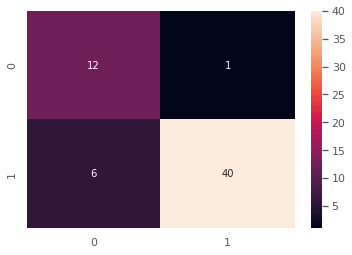

In [55]:
# heatmap for confusion matrix
sns.heatmap(confusion_matrix(Y_test,Y_pred),annot=True,fmt="d")

5)Random Forest Classifier

In [50]:
from sklearn.ensemble import RandomForestClassifier

ran_clf = RandomForestClassifier(criterion = 'entropy', max_depth = 10, max_features = 'auto', min_samples_leaf = 2, min_samples_split = 3, n_estimators = 130)
ran_clf.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=2,
                       min_samples_split=3, n_estimators=130)

In [51]:
Y_pred = ran_clf.predict(X_test)

In [52]:
# accuracy score
print(accuracy_score(Y_train, ran_clf.predict(X_train)))
ran_clf_acc = accuracy_score(Y_test, Y_pred)
print(ran_clf_acc)
# confusion matrix
print(confusion_matrix(Y_test,Y_pred))

1.0
0.9322033898305084
[[10  3]
 [ 1 45]]


<AxesSubplot:>

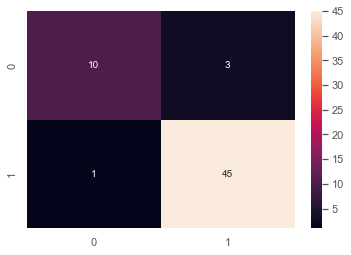

In [53]:
# heatmap for confusion matrix
sns.heatmap(confusion_matrix(Y_test,Y_pred),annot=True,fmt="d")


In [54]:
# classification report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.91      0.77      0.83        13
           1       0.94      0.98      0.96        46

    accuracy                           0.93        59
   macro avg       0.92      0.87      0.90        59
weighted avg       0.93      0.93      0.93        59



Model Comparison

In [55]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'SVM', 'Decision Tree Classifier', 'Random Forest Classifier'],
    'Score': [100*round(log_reg_acc,4), 100*round(knn_acc,4), 100*round(svc_acc,4), 100*round(dtc_acc,4), 100*round(ran_clf_acc,4)]
})
models.sort_values(by = 'Score', ascending = False)

,Model,Score
1,KNN,93.22
4,Random Forest Classifier,93.22
2,SVM,89.83
0,Logistic Regression,88.14
3,Decision Tree Classifier,88.14


In [56]:
import pickle
model = knn
pickle.dump(model, open("ParkinsonsDetection.pkl",'wb'))